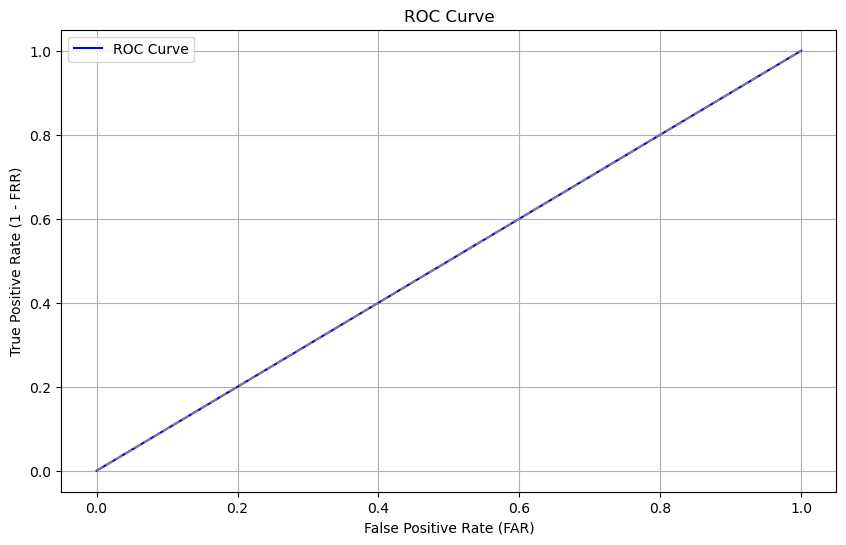

In [1]:
# Plotting the ROC Curve

# Establishing Connection to the database

from sklearn.metrics import roc_curve
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def database_connection():
    DB_USER = 'root'
    try:
        with open(r'C:\Users\B&P\Documents\analytics_platform\DB_Password.txt', 'r') as file:
            DB_PASSWORD = file.read().strip()  # Strip any extra spaces/newlines
    except FileNotFoundError:
        raise Exception("DB_Password.txt file not found. Please make sure the password file is in the correct location.")
    DB_HOST = '127.0.0.1'
    DB_PORT = '3306'
    DB_NAME = 'iNspectorate_implementation'
    global engine
    connection_string = f'mariadb://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
    engine = create_engine(connection_string)
database_connection()

query = "SELECT score, count FROM mated_frequency"
df_mated = pd.read_sql(query, con=engine)

query1 = "SELECT score, count FROM nonmated_frequency"
df_nonmated = pd.read_sql(query1, con=engine)

# Get genuine and impostor scores
y_true = np.concatenate([np.ones(len(df_mated)), np.zeros(len(df_nonmated))])  # 1 for genuine, 0 for impostor
y_scores = np.concatenate([df_mated['score'], df_nonmated['score']])  # Matching scores

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_true, y_scores)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label="ROC Curve", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FAR)")
plt.ylabel("True Positive Rate (1 - FRR)")
plt.legend()
plt.grid()
plt.show()